# LAB 7

## Time series analysis

In [1]:
from __future__ import print_function, division

%matplotlib inline

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

import numpy as np
import pandas as pd

import random

import thinkstats2
import thinkplot

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [187]:
plt.rcParams['figure.figsize'] = (15.0, 12.0)

In [2]:
data = pd.read_csv("rec-crime-pfa.csv", parse_dates = [0])

In [147]:
df = pd.read_csv("rec-crime-pfa.csv", parse_dates = [0])

In [70]:
data.head(100)

,date,PFA,region,offence,total,year,month,day
0,2003-03-31,Avon and Somerset,South West,All other theft offences,25959,2003,3,31
1,2003-03-31,Avon and Somerset,South West,Bicycle theft,3090,2003,3,31
2,2003-03-31,Avon and Somerset,South West,Criminal damage and arson,26202,2003,3,31
3,2003-03-31,Avon and Somerset,South West,Death or serious injury caused by illegal driving,2,2003,3,31
4,2003-03-31,Avon and Somerset,South West,Domestic burglary,14561,2003,3,31
5,2003-03-31,Avon and Somerset,South West,Drug offences,2308,2003,3,31
6,2003-03-31,Avon and Somerset,South West,Fraud offences,5339,2003,3,31
7,2003-03-31,Avon and Somerset,South West,Homicide,19,2003,3,31
8,2003-03-31,Avon and Somerset,South West,Miscellaneous crimes against society,1597,2003,3,31
9,2003-03-31,Avon and Somerset,South West,Non-domestic burglary,15621,2003,3,31


In [6]:
print('There are '+ str(data.shape[0])+ ' rows and '+ str(data.shape[1]) +' columns')

There are 46469 rows and 5 columns


#rename just for convenience
data.rename({'Region' : 'region', 
             'Offence' : 'offence',
             'Rolling year total number of offences' : 'total',
             'Year' : 'year',
             'Month' : 'month',
             'Day' : 'day'}, axis = 'columns', inplace = 'True')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46469 entries, 0 to 46468
Data columns (total 5 columns):
12 months ending                         46469 non-null datetime64[ns]
PFA                                      46469 non-null object
Region                                   46469 non-null object
Offence                                  46469 non-null object
Rolling year total number of offences    46469 non-null int64
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.8+ MB


In [8]:
dataset = {'unique_values' : data.nunique(),
        'na_values' : data.isna().sum(),
        'data_types' : data.dtypes}
pd.DataFrame(dataset)

,unique_values,na_values,data_types
12 months ending,52,0,datetime64[ns]
PFA,47,0,object
Region,14,0,object
Offence,25,0,object
Rolling year total number of offences,13638,0,int64


In [25]:
data['12 months ending'] = pd.to_datetime(data['12 months ending'])

#Get year, month, day
data['Year'] = data['12 months ending'].dt.year
data['Month'] = data['12 months ending'].dt.month
data['Day'] = data['12 months ending'].dt.day

In [148]:
df['12 months ending'] = pd.to_datetime(df['12 months ending'])

#Get year, month, day
df['Year'] = df['12 months ending'].dt.year
df['Month'] = df['12 months ending'].dt.month
df['Day'] = df['12 months ending'].dt.day

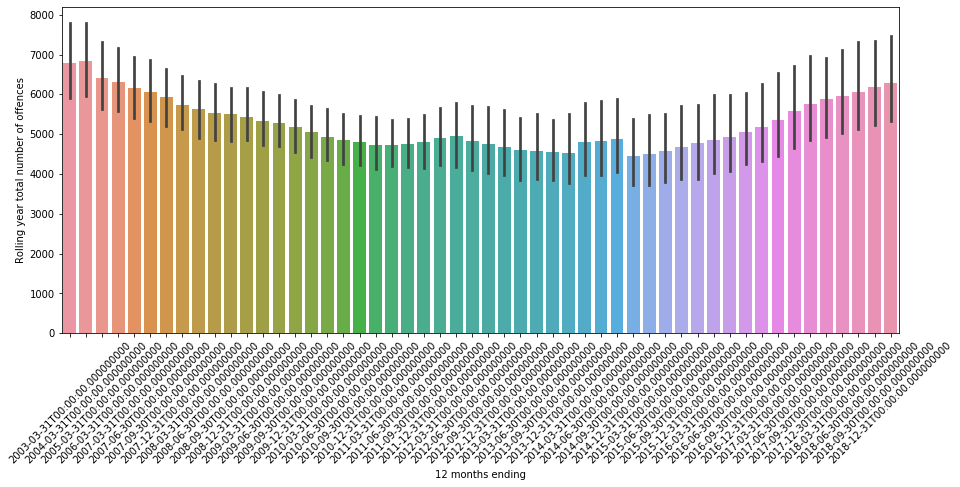

In [11]:
## Crime based on year
plt.figure(figsize = (15,6))
ax = sns.barplot(x = '12 months ending', y = 'Rolling year total number of offences', data = data)
plt.xticks(rotation = 45,fontsize = 10)
plt.show()

In [38]:
data.rename(columns={'12 months ending': 'date', 
                     'Rolling year total number of offences': 'total', 
                     'Region': 'region'}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46469 entries, 0 to 46468
Data columns (total 8 columns):
date       46469 non-null datetime64[ns]
PFA        46469 non-null object
region     46469 non-null object
offence    46469 non-null object
total      46469 non-null int64
year       46469 non-null int64
month      46469 non-null int64
day        46469 non-null int64
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 2.8+ MB


In [149]:
df.rename(columns={'12 months ending': 'date', 
                     'Rolling year total number of offences': 'total', 
                     'Region': 'region'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46469 entries, 0 to 46468
Data columns (total 8 columns):
date       46469 non-null datetime64[ns]
PFA        46469 non-null object
region     46469 non-null object
Offence    46469 non-null object
total      46469 non-null int64
Year       46469 non-null int64
Month      46469 non-null int64
Day        46469 non-null int64
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 2.8+ MB


In [33]:
def GroupByStocks(data):
    
    groups = data.groupby('region')
    dailies = {}
    for name, group in groups:
        dailies[name] = GroupByDay(group)        

    return dailies

In [34]:
def GroupByDay(data, func=np.mean):
    grouped = data[['date', 'total']].groupby('date')
    daily = grouped.aggregate(func)

    daily['date'] = daily.index
    start = daily.date[0]
    one_year = np.timedelta64(1, 'Y')
    daily['years'] = (daily.date - start) / one_year

    return daily

In [37]:
dailies = GroupByStocks(data)

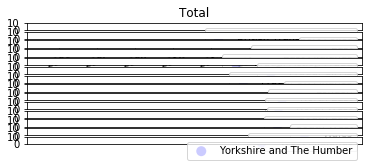

In [17]:
import matplotlib.pyplot as plt

thinkplot.PrePlot(rows = 25)
for i, (name, daily) in enumerate(dailies.items()):
    thinkplot.SubPlot(i+1)
    title = 'Total' if i == 0 else ''
    thinkplot.Config(ylim=[0, 10], title=title)
    thinkplot.Scatter(daily.total, s=100, label = name)
    if i == 2: 
        plt.xticks(rotation = 10)
        thinkplot.Config()
    else:
        thinkplot.Config(xticks = [])

In [20]:
import statsmodels.formula.api as smf

def RunLinearModel(daily):
    model = smf.ols('total ~ years', data=daily)
    results = model.fit()
    return model, results

In [21]:
from IPython.display import display

for name, daily in dailies.items():
    model, results = RunLinearModel(daily)
    print(name)
    display(results.summary())

British Transport Police


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     93.99
Date:                Thu, 05 Dec 2019   Prob (F-statistic):           4.52e-13
Time:                        22:17:58   Log-Likelihood:                -370.64
No. Observations:                  52   AIC:                             745.3
Df Residuals:                      50   BIC:                             749.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3828.9994    106.827     35.843      0.000    3614.431    4043.568
years       -102.8515     10.609     -9.695      0.000    -124.161     -81.542
==============================================================================
Omnibus:                        8.510   Durbin-Watson:                   0.073
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                7.922
Skew:                           0.927   Prob(JB):                       0.0190
Kurtosis:                       3.470   Cond. No.                         25.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

East


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     16.44
Date:                Thu, 05 Dec 2019   Prob (F-statistic):           0.000175
Time:                        22:17:58   Log-Likelihood:                -383.47
No. Observations:                  52   AIC:                             770.9
Df Residuals:                      50   BIC:                             774.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3653.4575    136.726     26.721      0.000    3378.835    3928.080
years        -55.0607     13.578     -4.055      0.000     -82.334     -27.788
==============================================================================
Omnibus:                        4.730   Durbin-Watson:                   0.042
Prob(Omnibus):                  0.094   Jarque-Bera (JB):                4.397
Skew:                           0.647   Prob(JB):                        0.111
Kurtosis:                       2.403   Cond. No.                         25.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

East Midlands


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     101.7
Date:                Thu, 05 Dec 2019   Prob (F-statistic):           1.22e-13
Time:                        22:17:58   Log-Likelihood:                -383.92
No. Observations:                  52   AIC:                             771.8
Df Residuals:                      50   BIC:                             775.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4556.7793    137.910     33.042      0.000    4279.778    4833.780
years       -138.0964     13.696    -10.083      0.000    -165.606    -110.587
==============================================================================
Omnibus:                        3.983   Durbin-Watson:                   0.048
Prob(Omnibus):                  0.136   Jarque-Bera (JB):                3.837
Skew:                           0.646   Prob(JB):                        0.147
Kurtosis:                       2.680   Cond. No.                         25.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Fraud: Action Fraud


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     199.9
Date:                Thu, 05 Dec 2019   Prob (F-statistic):           1.53e-14
Time:                        22:17:58   Log-Likelihood:                -364.80
No. Observations:                  31   AIC:                             733.6
Df Residuals:                      29   BIC:                             736.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.345e+04   1.13e+04      4.719      0.000    3.03e+04    7.66e+04
years       3.666e+04   2592.941     14.139      0.000    3.14e+04     4.2e+04
==============================================================================
Omnibus:                        5.780   Durbin-Watson:                   0.093
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                2.711
Skew:                           0.450   Prob(JB):                        0.258
Kurtosis:                       1.864   Cond. No.                         8.87
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Fraud: CIFAS


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     49.90
Date:                Thu, 05 Dec 2019   Prob (F-statistic):           9.03e-08
Time:                        22:17:58   Log-Likelihood:                -368.22
No. Observations:                  31   AIC:                             740.4
Df Residuals:                      29   BIC:                             743.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.71e+05   1.26e+04     13.519      0.000    1.45e+05    1.97e+05
years       2.045e+04   2894.892      7.064      0.000    1.45e+04    2.64e+04
==============================================================================
Omnibus:                       14.431   Durbin-Watson:                   0.328
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.795
Skew:                          -1.301   Prob(JB):                     0.000372
Kurtosis:                       5.335   Cond. No.                         8.87
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Fraud: UK Finance


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     2.265
Date:                Thu, 05 Dec 2019   Prob (F-statistic):              0.143
Time:                        22:17:58   Log-Likelihood:                -346.87
No. Observations:                  31   AIC:                             697.7
Df Residuals:                      29   BIC:                             700.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.026e+05   6351.333     16.153      0.000    8.96e+04    1.16e+05
years      -2188.1902   1453.922     -1.505      0.143   -5161.794     785.414
==============================================================================
Omnibus:                       25.483   Durbin-Watson:                   0.427
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.838
Skew:                          -1.795   Prob(JB):                     5.54e-12
Kurtosis:                       8.220   Cond. No.                         8.87
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

London


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     132.8
Date:                Thu, 05 Dec 2019   Prob (F-statistic):           1.09e-15
Time:                        22:17:58   Log-Likelihood:                -443.09
No. Observations:                  52   AIC:                             890.2
Df Residuals:                      50   BIC:                             894.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.483e+04    430.314     57.692      0.000     2.4e+04    2.57e+04
years       -492.5462     42.735    -11.526      0.000    -578.382    -406.711
==============================================================================
Omnibus:                        5.712   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                5.181
Skew:                           0.772   Prob(JB):                       0.0750
Kurtosis:                       3.096   Cond. No.                         25.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

North East


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     2.863
Date:                Thu, 05 Dec 2019   Prob (F-statistic):             0.0968
Time:                        22:17:58   Log-Likelihood:                -418.16
No. Observations:                  52   AIC:                             840.3
Df Residuals:                      50   BIC:                             844.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3645.7659    266.411     13.685      0.000    3110.664    4180.868
years        -44.7701     26.458     -1.692      0.097     -97.912       8.371
==============================================================================
Omnibus:                        6.692   Durbin-Watson:                   0.026
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                4.763
Skew:                           0.600   Prob(JB):                       0.0924
Kurtosis:                       2.130   Cond. No.                         25.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

North West


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     15.05
Date:                Thu, 05 Dec 2019   Prob (F-statistic):           0.000307
Time:                        22:17:58   Log-Likelihood:                -431.60
No. Observations:                  52   AIC:                             867.2
Df Residuals:                      50   BIC:                             871.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6964.2742    345.006     20.186      0.000    6271.309    7657.239
years       -132.9167     34.263     -3.879      0.000    -201.736     -64.098
==============================================================================
Omnibus:                        5.803   Durbin-Watson:                   0.036
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                5.802
Skew:                           0.788   Prob(JB):                       0.0550
Kurtosis:                       2.561   Cond. No.                         25.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

South East


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     24.10
Date:                Thu, 05 Dec 2019   Prob (F-statistic):           1.01e-05
Time:                        22:17:58   Log-Likelihood:                -415.28
No. Observations:                  52   AIC:                             834.6
Df Residuals:                      50   BIC:                             838.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7002.5343    252.071     27.780      0.000    6496.235    7508.834
years       -122.9048     25.033     -4.910      0.000    -173.186     -72.624
==============================================================================
Omnibus:                        3.286   Durbin-Watson:                   0.052
Prob(Omnibus):                  0.193   Jarque-Bera (JB):                3.057
Skew:                           0.526   Prob(JB):                        0.217
Kurtosis:                       2.450   Cond. No.                         25.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

South West


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     52.69
Date:                Thu, 05 Dec 2019   Prob (F-statistic):           2.36e-09
Time:                        22:17:58   Log-Likelihood:                -381.53
No. Observations:                  52   AIC:                             767.1
Df Residuals:                      50   BIC:                             771.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4292.5675    131.711     32.591      0.000    4028.018    4557.117
years        -94.9488     13.080     -7.259      0.000    -121.221     -68.676
==============================================================================
Omnibus:                        7.526   Durbin-Watson:                   0.046
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                3.871
Skew:                           0.446   Prob(JB):                        0.144
Kurtosis:                       2.004   Cond. No.                         25.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Wales


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     43.96
Date:                Thu, 05 Dec 2019   Prob (F-statistic):           2.28e-08
Time:                        22:17:58   Log-Likelihood:                -369.24
No. Observations:                  52   AIC:                             742.5
Df Residuals:                      50   BIC:                             746.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3275.7576    103.986     31.502      0.000    3066.895    3484.620
years        -68.4676     10.327     -6.630      0.000     -89.210     -47.725
==============================================================================
Omnibus:                        4.547   Durbin-Watson:                   0.048
Prob(Omnibus):                  0.103   Jarque-Bera (JB):                4.222
Skew:                           0.696   Prob(JB):                        0.121
Kurtosis:                       2.888   Cond. No.                         25.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

West Midlands


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     39.41
Date:                Thu, 05 Dec 2019   Prob (F-statistic):           8.08e-08
Time:                        22:17:58   Log-Likelihood:                -411.74
No. Observations:                  52   AIC:                             827.5
Df Residuals:                      50   BIC:                             831.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6349.3987    235.490     26.963      0.000    5876.404    6822.393
years       -146.8194     23.387     -6.278      0.000    -193.793     -99.846
==============================================================================
Omnibus:                        5.591   Durbin-Watson:                   0.056
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                5.119
Skew:                           0.696   Prob(JB):                       0.0773
Kurtosis:                       2.348   Cond. No.                         25.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Yorkshire and The Humber


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     18.17
Date:                Thu, 05 Dec 2019   Prob (F-statistic):           8.92e-05
Time:                        22:17:58   Log-Likelihood:                -428.73
No. Observations:                  52   AIC:                             861.5
Df Residuals:                      50   BIC:                             865.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6913.9740    326.505     21.176      0.000    6258.169    7569.780
years       -138.2328     32.426     -4.263      0.000    -203.362     -73.104
==============================================================================
Omnibus:                        5.789   Durbin-Watson:                   0.052
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                5.139
Skew:                           0.687   Prob(JB):                       0.0766
Kurtosis:                       2.304   Cond. No.                         25.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
def PlotFittedValues(model, results, label=''):

    years = model.exog[:,1]
    values = model.endog
    thinkplot.Scatter(years, values, s=15, label=label)
    thinkplot.Plot(years, results.fittedvalues, label='model', color='#ff7f00')

In [23]:
def PlotLinearModel(daily, name):

    model, results = RunLinearModel(daily)
    PlotFittedValues(model, results, label=name)
    thinkplot.Config(title='Fitted values',
                     xlabel='Years',
                     xlim=[-0.1, 3.8],
                     ylabel='Total')

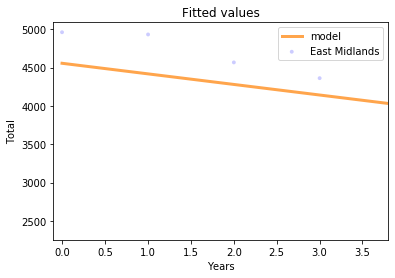

In [37]:
name = 'East Midlands'
daily = dailies[name]

PlotLinearModel(daily, name)

In [29]:
array = np.arange(10)

In [30]:
series = pd.Series(array)
series.rolling(3).mean()

0    NaN
1    NaN
2    1.0
3    2.0
4    3.0
5    4.0
6    5.0
7    6.0
8    7.0
9    8.0
dtype: float64

In [35]:
class SerialCorrelationTest(thinkstats2.HypothesisTest):
    """Tests serial correlations by permutation."""

    def TestStatistic(self, data):
        """Computes the test statistic.

        data: tuple of xs and ys
        """
        series, lag = data
        test_stat = abs(SerialCorr(series, lag))
        return test_stat

    def RunModel(self):
        """Run the model of the null hypothesis.

        returns: simulated data
        """
        series, lag = self.data
        permutation = series.reindex(np.random.permutation(series.index))
        return permutation, lag

In [41]:
def SerialCorr(series, lag=1):
    xs = series[lag:]
    ys = series.shift(lag)[lag:]
    corr = thinkstats2.Corr(xs, ys)
    return corr

In [42]:
name = 'East Midlands'
daily = dailies[name]

series = daily.total
test = SerialCorrelationTest((series, 1))
pvalue = test.PValue()
print(test.actual, pvalue)

0.992283445047251 0.0


In [48]:
def RunQuadraticModel(daily):

    daily['years2'] = daily.years**2
    model = smf.ols('total ~ years + years2', data=daily)
    results = model.fit()
    return model, results

In [49]:
name = 'British Transport Police'
daily = dailies[name]

model, results = RunQuadraticModel(daily)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     101.7
Date:                Thu, 05 Dec 2019   Prob (F-statistic):           3.65e-18
Time:                        23:28:15   Log-Likelihood:                -355.53
No. Observations:                  52   AIC:                             717.1
Df Residuals:                      49   BIC:                             722.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4521.5778    137.601     32.860      0.000    4245.058    4798.098
years       -304.9128     33.489     -9.105      0.000    -372.213    -237.613
years2        11.5687      1.862      6.214      0.000       7.828      15.310
==============================================================================
Omnibus:                        2.504   Durbin-Watson:                   0.186
Prob(Omnibus):                  0.286   Jarque-Bera (JB):                1.607
Skew:                          -0.374   Prob(JB):                        0.448
Kurtosis:                       3.425   Cond. No.                         547.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

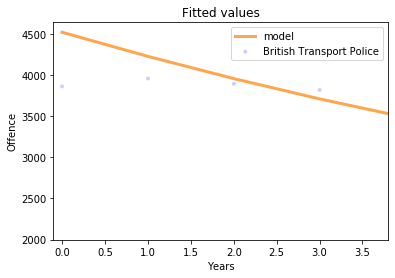

In [50]:
PlotFittedValues(model, results, label=name)
thinkplot.Config(title='Fitted values',
                 xlabel='Years',
                 xlim=[-0.1, 3.8],
                 ylabel='Offence')

In [55]:
def SimulateResults(daily, iters=101, func=RunLinearModel):
    """Run simulations based on resampling residuals.

    daily: DataFrame of daily prices
    iters: number of simulations
    func: function that fits a model to the data

    returns: list of result objects
    """
    _, results = func(daily)
    fake = daily.copy()
    
    result_seq = []
    for _ in range(iters):
        fake.ppg = results.fittedvalues + thinkstats2.Resample(results.resid)
        _, fake_results = func(fake)
        result_seq.append(fake_results)

    return result_seq

In [57]:
def GeneratePredictions(result_seq, years, add_resid=False):
    """Generates an array of predicted values from a list of model results.

    When add_resid is False, predictions represent sampling error only.

    When add_resid is True, they also include residual error (which is
    more relevant to prediction).
    
    result_seq: list of model results
    years: sequence of times (in years) to make predictions for
    add_resid: boolean, whether to add in resampled residuals

    returns: sequence of predictions
    """
    n = len(years)
    d = dict(Intercept=np.ones(n), years=years, years2=years**2)
    predict_df = pd.DataFrame(d)
    
    predict_seq = []
    for fake_results in result_seq:
        predict = fake_results.predict(predict_df)
        if add_resid:
            predict += thinkstats2.Resample(fake_results.resid, n)
        predict_seq.append(predict)

    return predict_seq

In [53]:
def PlotPredictions(daily, years, iters=101, percent=90, func=RunLinearModel):
    """Plots predictions.

    daily: DataFrame of daily prices
    years: sequence of times (in years) to make predictions for
    iters: number of simulations
    percent: what percentile range to show
    func: function that fits a model to the data
    """
    result_seq = SimulateResults(daily, iters=iters, func=func)
    p = (100 - percent) / 2
    percents = p, 100-p

    predict_seq = GeneratePredictions(result_seq, years, add_resid=True)
    low, high = thinkstats2.PercentileRows(predict_seq, percents)
    thinkplot.FillBetween(years, low, high, alpha=0.3, color='gray')

    predict_seq = GeneratePredictions(result_seq, years, add_resid=False)
    low, high = thinkstats2.PercentileRows(predict_seq, percents)
    thinkplot.FillBetween(years, low, high, alpha=0.5, color='gray')

D:\3 course\anaconda\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  from ipykernel import kernelapp as app


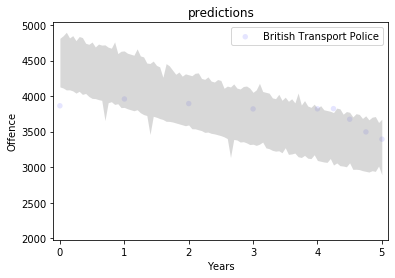

In [58]:
years = np.linspace(0, 5, 101)
thinkplot.Scatter(daily.years, daily.total, alpha=0.1, label=name)
PlotPredictions(daily, years, func=RunQuadraticModel)
thinkplot.Config(title='predictions',
                 xlabel='Years',
                 xlim=[years[0]-0.1, years[-1]+0.1],
                 ylabel='Offence')

In [59]:
class SerialCorrelationTest(thinkstats2.HypothesisTest):
    """Tests serial correlations by permutation."""

    def TestStatistic(self, data):
        """Computes the test statistic.

        data: tuple of xs and ys
        """
        series, lag = data
        test_stat = abs(SerialCorr(series, lag))
        return test_stat

    def RunModel(self):
        """Run the model of the null hypothesis.

        returns: simulated data
        """
        series, lag = self.data
        permutation = series.reindex(np.random.permutation(series.index))
        return permutation, lag

In [61]:
name = 'British Transport Police'
daily = dailies[name]

series = daily.total
test = SerialCorrelationTest((series, 1))
pvalue = test.PValue()
print(test.actual, pvalue)

0.988879808627392 0.0


In [62]:
name = 'London'
daily = dailies[name]

series = daily.total
test = SerialCorrelationTest((series, 1))
pvalue = test.PValue()
print(test.actual, pvalue)

0.9857972338584131 0.0


In [63]:
_, results = RunLinearModel(daily)
series = results.resid
test = SerialCorrelationTest((series, 1))
pvalue = test.PValue()
print(test.actual, pvalue)

0.9454080820443049 0.0


In [64]:
_, results = RunQuadraticModel(daily)
series = results.resid
test = SerialCorrelationTest((series, 1))
pvalue = test.PValue()
print(test.actual, pvalue)

0.8853113220800187 0.0


# LAB 8

## Survival analysis

In [15]:
import lifelines as ll

In [81]:
from lifelines.plotting import plot_lifetimes 

In [16]:
from lifelines import KaplanMeierFitter

#### create a kmf object

In [20]:
kmf = KaplanMeierFitter()

In [47]:
groupby_reg = data.groupby('region')

In [48]:
for rate in groupby_reg['offence']:
    print(rate)

('British Transport Police', 40                                All other theft offences
41                                           Bicycle theft
42                               Criminal damage and arson
43       Death or serious injury caused by illegal driving
44                                       Domestic burglary
45                                           Drug offences
46                                          Fraud offences
47                                                Homicide
48                    Miscellaneous crimes against society
49                                   Non-domestic burglary
50                          Possession of weapons offences
51                                   Public order offences
52                                                 Robbery
53                                         Sexual offences
54                                             Shoplifting
55                                 Stalking and harassment
56                         

In [67]:
for rate in groupby_reg['total']:
    print(rate)

('British Transport Police', region
British Transport Police    21711
British Transport Police     2737
British Transport Police    11334
British Transport Police        0
British Transport Police       12
British Transport Police     2230
British Transport Police     1170
British Transport Police        4
British Transport Police     1094
British Transport Police     1260
British Transport Police      734
British Transport Police     2817
British Transport Police     2242
British Transport Police      945
British Transport Police     1543
British Transport Police       21
British Transport Police    13096
British Transport Police     7164
British Transport Police     3386
British Transport Police     3764
British Transport Police    21588
British Transport Police     2947
British Transport Police    12910
British Transport Police        0
British Transport Police       12
British Transport Police     2451
British Transport Police     1250
British Transport Police       51
British Tran

In [71]:
groupby_year = data.groupby('year')

In [72]:
for rate in groupby_year['offence']:
    print(rate)

(2003, region
South West                                           All other theft offences
South West                                                      Bicycle theft
South West                                          Criminal damage and arson
South West                  Death or serious injury caused by illegal driving
South West                                                  Domestic burglary
South West                                                      Drug offences
South West                                                     Fraud offences
South West                                                           Homicide
South West                               Miscellaneous crimes against society
South West                                              Non-domestic burglary
South West                                     Possession of weapons offences
South West                                              Public order offences
South West                                        

In [75]:
for i in groupby_year:
    print(i)

(2003,           date                PFA                    region  \
0   2003-03-31  Avon and Somerset                South West   
1   2003-03-31  Avon and Somerset                South West   
2   2003-03-31  Avon and Somerset                South West   
3   2003-03-31  Avon and Somerset                South West   
4   2003-03-31  Avon and Somerset                South West   
5   2003-03-31  Avon and Somerset                South West   
6   2003-03-31  Avon and Somerset                South West   
7   2003-03-31  Avon and Somerset                South West   
8   2003-03-31  Avon and Somerset                South West   
9   2003-03-31  Avon and Somerset                South West   
10  2003-03-31  Avon and Somerset                South West   
11  2003-03-31  Avon and Somerset                South West   
12  2003-03-31  Avon and Somerset                South West   
13  2003-03-31  Avon and Somerset                South West   
14  2003-03-31  Avon and Somerset               

In [98]:
groups = data['year']

In [99]:
g1 = (groups == 2003)
g2 = (groups == 2004)
g3 = (groups == 2005)
g4 = (groups == 2006)
g5 = (groups == 2007)
g6 = (groups == 2008)
g7 = (groups == 2009)
g8 = (groups == 2010)
g9 = (groups == 2011)
g10 = (groups == 2012)
g11 = (groups == 2013)
g12 = (groups == 2014)
g13 = (groups == 2015)
g14 = (groups == 2016)
g15 = (groups == 2017)
g16 = (groups == 2018)

In [108]:
groups1 = data['region']

In [109]:
r1 = (groups1 == 'British Transport Police')
r2 = (groups1 == 'East')
r3 = (groups1 == 'East Midlands')
r4 = (groups1 == 'Fraud: Action Fraud')
r5 = (groups1 == 'Fraud: CIFAS')
r6 = (groups1 == 'Fraud: UK Finance')
r7 = (groups1 == 'London')
r8 = (groups1 == 'North East')
r9 = (groups1 == 'North West')
r10 = (groups1 == 'South East')
r11 = (groups1 == 'South West')
r12 = (groups1 == 'Wales')
r13 = (groups1 == 'West Midlands')
r14 = (groups1 == 'Yorkshire and The Humber')

In [97]:
data['year'] = pd.to_numeric(data['year'], errors = 'coerce')

kmf.fit(g1, groups1, label='2003')
a1 = kmf.plot()

In [113]:
cat_cols= [i  for i in data.columns if data[i].dtype==object]

In [114]:
for i in cat_cols:
    print('Column Name: ',i)
    print(data[i].value_counts())
    print('-----------------------------')

Column Name:  PFA
Hertfordshire               1054
Bedfordshire                1054
Kent                        1054
Cumbria                     1054
Hampshire                   1054
Essex                       1054
Dyfed-Powys                 1054
Devon and Cornwall          1054
Avon and Somerset           1054
Warwickshire                1054
Cheshire                    1054
Dorset                      1054
Leicestershire              1054
Staffordshire               1054
West Mercia                 1054
Wiltshire                   1054
South Yorkshire             1054
Humberside                  1054
Metropolitan Police         1054
Norfolk                     1054
North Yorkshire             1054
City of London              1054
Thames Valley               1054
Greater Manchester          1054
Durham                      1054
Derbyshire                  1054
Sussex                      1054
West Midlands               1054
Cambridgeshire              1054
Lancashire               

In [131]:
data.columns

Index(['date', 'PFA', 'region', 'offence', 'total', 'year', 'month', 'day'], dtype='object')

In [135]:
df_r = data.loc[:,['date', 'PFA', 'region', 'offence', 'total', 'year', 'month', 'day']]

In [136]:
df_r.head()

,date,PFA,region,offence,total,year,month,day
0,2003-03-31,Avon and Somerset,South West,All other theft offences,25959,2003,3,31
1,2003-03-31,Avon and Somerset,South West,Bicycle theft,3090,2003,3,31
2,2003-03-31,Avon and Somerset,South West,Criminal damage and arson,26202,2003,3,31
3,2003-03-31,Avon and Somerset,South West,Death or serious injury caused by illegal driving,2,2003,3,31
4,2003-03-31,Avon and Somerset,South West,Domestic burglary,14561,2003,3,31


In [119]:
from lifelines import CoxPHFitter

In [120]:
cph = CoxPHFitter()   ## Instantiate the class to create a cph object

In [138]:
## Create dummy variables
df_dummy = pd.get_dummies(df_r, drop_first = True)
df_dummy.head()

,date,total,year,month,day,PFA_Avon and Somerset,PFA_Bedfordshire,PFA_British Transport Police,PFA_CIFAS,PFA_Cambridgeshire,...,offence_Residential burglary,offence_Robbery,offence_Sexual offences,offence_Shoplifting,offence_Stalking and harassment,offence_Theft from the person,offence_UK Finance,offence_Vehicle offences,offence_Violence with injury,offence_Violence without injury
0,2003-03-31,25959,2003,3,31,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2003-03-31,3090,2003,3,31,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2003-03-31,26202,2003,3,31,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2003-03-31,2,2003,3,31,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2003-03-31,14561,2003,3,31,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


cph.fit(df_dummy, 'total', event_col = 'region')   ## Fit the data to train the model

cph.print_summary()    ## HAve a look at the significance of the features
kmf.fit(data['year'], data['region'])

In [152]:
df.columns

Index(['date', 'PFA', 'region', 'Offence', 'total', 'Year', 'Month', 'Day'], dtype='object')

In [179]:
T = df['Year']     ## time to event
E = df['Offence']      ## event occurred or censored
C = df['total']

In [177]:
df['Year']=pd.to_numeric(df['Year'],errors='coerce')

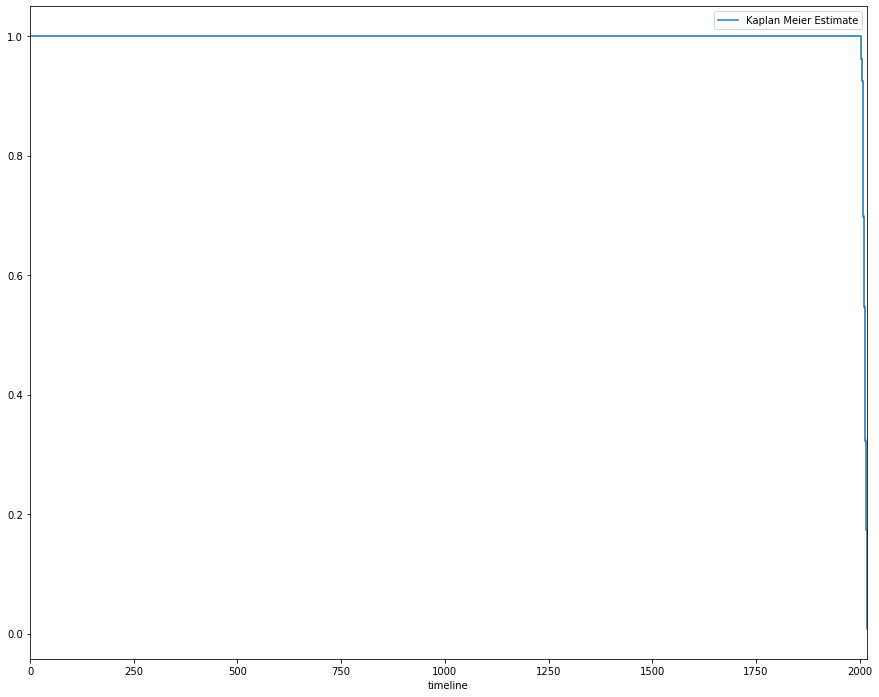

In [188]:
kmf.fit(T, C, label='Kaplan Meier Estimate')

## Create an estimate
kmf.plot()

In [169]:
groups2 = df['region']             ## Create the cohorts from the 'Contract' column
reg1 = (groups2 == 'British Transport Police')
reg2 = (groups2 == 'East')
reg3 = (groups2 == 'East Midlands')
reg4 = (groups2 == 'Fraud: Action Fraud')
reg5 = (groups2 == 'Fraud: CIFAS')
reg6 = (groups2 == 'Fraud: UK Finance')
reg7 = (groups2 == 'London')
reg8 = (groups2 == 'North East')
reg9 = (groups2 == 'North West')
reg10 = (groups2 == 'South East')
reg11 = (groups2 == 'South West')
reg12 = (groups2 == 'Wales')
reg13 = (groups2 == 'West Midlands')
reg14 = (groups2 == 'Yorkshire and The Humber')

In [191]:
print(T[reg1], E[reg1], C[reg1])

40       2003
41       2003
42       2003
43       2003
44       2003
45       2003
46       2003
47       2003
48       2003
49       2003
50       2003
51       2003
52       2003
53       2003
54       2003
55       2003
56       2003
57       2003
58       2003
59       2003
920      2004
921      2004
922      2004
923      2004
924      2004
925      2004
926      2004
927      2004
928      2004
929      2004
         ... 
44670    2018
44671    2018
44672    2018
44673    2018
44674    2018
44675    2018
44676    2018
44677    2018
44678    2018
45585    2018
45586    2018
45587    2018
45588    2018
45589    2018
45590    2018
45591    2018
45592    2018
45593    2018
45594    2018
45595    2018
45596    2018
45597    2018
45598    2018
45599    2018
45600    2018
45601    2018
45602    2018
45603    2018
45604    2018
45605    2018
Name: Year, Length: 1054, dtype: int64 40                                All other theft offences
41                                           Bic

kmf.fit(T[r1], E[r1], label='British Transport Police')    ## fit the cohort 1 data
ax = kmf.plot()


kmf.fit(T[r2], E[r2], label='East')         ## fit the cohort 2 data
ax1 = kmf.plot(ax = ax)


kmf.fit(T[r3], E[r3], label='East Midlands')        ## fit the cohort 3 data
kmf.plot(ax = ax1)                                 ## Plot the KM curve for three cohort on same x and y axis


kmf.fit(T[r4], E[r4], label='Fraud: Action Fraud')
ax2 = kmf.plot(ax = ax2)


kmf.fit(T[r5], E[r5], label='Fraud: CIFAS')
kmf.plot(ax = ax3)


kmf.fit(T[r6], E[r6], label='Fraud: UK Finance')
ax1 = kmf.plot(ax = ax4)


kmf.fit(T[r7], E[r7], label='London')
kmf.plot(ax = ax5)


kmf.fit(T[r8], E[r8], label='North East')
ax1 = kmf.plot(ax = ax6)


kmf.fit(T[r9], E[r9], label='North West')
kmf.plot(ax = ax7)


kmf.fit(T[r10], E[r10], label='South East')
ax1 = kmf.plot(ax = ax8)


kmf.fit(T[r11], E[r11], label='South West')
kmf.plot(ax = ax9)


kmf.fit(T[r12], E[r12], label='Wales')
kmf.plot(ax = ax10)


kmf.fit(T[r13], E[r13], label='West Midlands')
ax1 = kmf.plot(ax = ax11)


kmf.fit(T[r14], E[r14], label='Yorkshire and The Humber')
kmf.plot(ax = ax12)

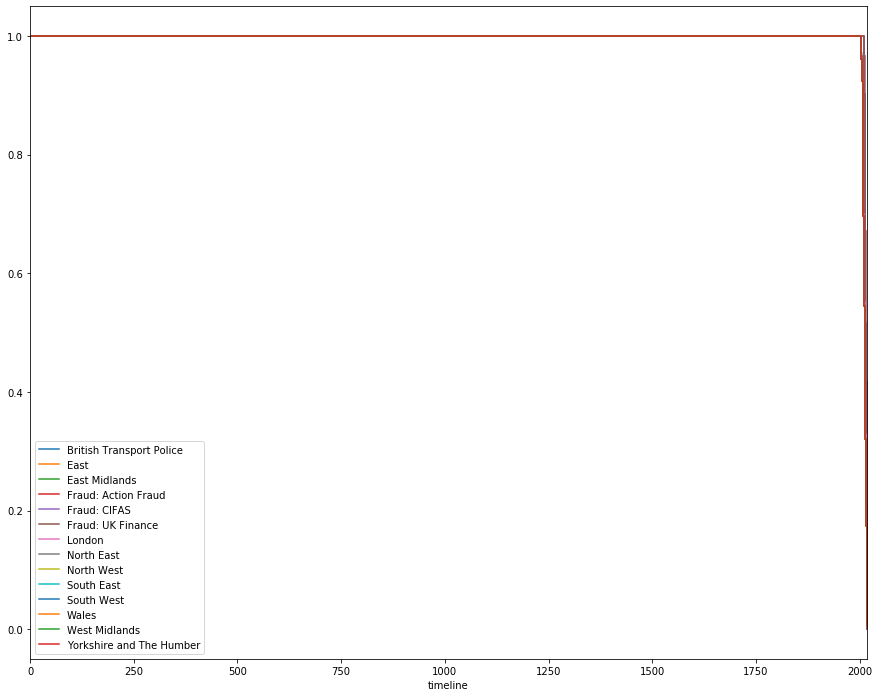

In [190]:
kmf.fit(T[r1], C[r1], label='British Transport Police')    ## fit the cohort 1 data
ax = kmf.plot()


kmf.fit(T[r2], C[r2], label='East')         ## fit the cohort 2 data
ax1 = kmf.plot(ax = ax)


kmf.fit(T[r3], C[r3], label='East Midlands')        ## fit the cohort 3 data
ax2 = kmf.plot(ax = ax1)                                 ## Plot the KM curve for three cohort on same x and y axis


kmf.fit(T[r4], C[r4], label='Fraud: Action Fraud')
ax3 = kmf.plot(ax = ax2)


kmf.fit(T[r5], C[r5], label='Fraud: CIFAS')
ax4 = kmf.plot(ax = ax3)


kmf.fit(T[r6], C[r6], label='Fraud: UK Finance')
ax5 = kmf.plot(ax = ax4)


kmf.fit(T[r7], C[r7], label='London')
ax6 = kmf.plot(ax = ax5)


kmf.fit(T[r8], C[r8], label='North East')
ax7 = kmf.plot(ax = ax6)


kmf.fit(T[r9], C[r9], label='North West')
ax8 = kmf.plot(ax = ax7)


kmf.fit(T[r10], C[r10], label='South East')
ax9 = kmf.plot(ax = ax8)


kmf.fit(T[r11], C[r11], label='South West')
ax10 = kmf.plot(ax = ax9)


kmf.fit(T[r12], C[r12], label='Wales')
ax11 = kmf.plot(ax = ax10)


kmf.fit(T[r13], C[r13], label='West Midlands')
ax12 = kmf.plot(ax = ax11)


kmf.fit(T[r14], C[r14], label='Yorkshire and The Humber')
ax13 = kmf.plot(ax = ax12)